In [1]:
import pandas as pd, numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_excel(r'C:\Users\jaish\Downloads\Bitcoin_Cleaned.xlsx')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Volume,MarketCap
2019-01-01,2019-01-01,3746.713387,3850.913765,3707.231303,3843.519967,4.324201e+09,6.709863e+10
2019-01-02,2019-01-02,3849.216409,3947.981273,3817.409496,3943.409337,5.244857e+09,6.884986e+10
2019-01-03,2019-01-03,3931.048638,3935.685131,3826.222871,3836.741319,4.530215e+09,6.699492e+10
2019-01-04,2019-01-04,3832.039968,3865.934532,3783.853665,3857.717619,4.847965e+09,6.736833e+10
2019-01-05,2019-01-05,3851.973965,3904.903096,3836.900126,3845.194460,5.137610e+09,6.715757e+10
...,...,...,...,...,...,...,...
2023-11-27,2023-11-27,37454.191955,37559.354550,36750.127105,37254.168854,1.900293e+10,7.284955e+11
2023-11-28,2023-11-28,37247.991175,38368.479955,36891.089362,37831.086868,2.169614e+10,7.398131e+11
2023-11-29,2023-11-29,37826.105522,38366.112997,37612.631623,37858.494055,2.072855e+10,7.403799e+11
2023-11-30,2023-11-30,37861.118883,38141.753547,37531.141629,37712.747772,1.811598e+10,7.375609e+11


In [3]:
future_days=5

In [4]:
df[str(future_days)+'_Day_Price_Forecast']=df[['Close']].shift(-future_days)
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2019-01-01,3843.519967,4076.632685
2019-01-02,3943.409337,4025.248287
2019-01-03,3836.741319,4030.847999
2019-01-04,3857.717619,4035.296369
2019-01-05,3845.194460,3678.924681
...,...,...
2023-11-27,37254.168854,NaN
2023-11-28,37831.086868,NaN
2023-11-29,37858.494055,NaN
2023-11-30,37712.747772,NaN


In [5]:
X=np.array(df[['Close']])
X=X[:df.shape[0] - future_days]
print(X)

[[ 3843.51996727]
 [ 3943.40933686]
 [ 3836.74131867]
 ...
 [37720.28115214]
 [37796.79234485]
 [37479.12229366]]


In [6]:
y=np.array(df[str(future_days)+'_Day_Price_Forecast'])
y=y[:-future_days]
print(y)

[ 4076.63268458  4025.24828708  4030.84799935 ... 37858.49405482
 37712.74777163 38688.74836119]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [9]:
svr_rbf_confidence =svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.7032362955152913


In [10]:
svm_prediction=svr_rbf.predict(x_test)
print(svm_prediction)

[38943.35286541 12215.89794077 35466.65362387 17799.15260164
 33914.65958606 34154.40151368 36014.69096629  7647.88904976
 29145.54677871 32233.90846309  9389.7540897   8496.58865697
 10245.54911243 11777.70503434 23049.80432468 20718.73063097
  9788.09456145 20430.0257119  36910.93199451  9628.12853422
 28277.30628799 10250.83667807 26299.71855678 24466.64208164
  9274.19969397 19969.341818    9411.3343083   8849.34031961
 30156.32114141 11737.24117353 20736.13338053  9025.09556709
  6087.64714437 29272.98961248 31987.28963148 23901.27622208
 20642.20355145 27169.84174969 22890.43594115 32896.04603315
 35086.34627191 23273.15083872 23256.64121105 30340.94288415
  8571.05762218 20202.00977952 23592.08685951 36654.76036869
 20785.07229831 26737.0597007  21517.14688972 29761.05238161
  9822.16476023 34805.52311168 32833.28494662 20607.67213889
  8854.8418271   9464.11273811  7560.35610672 20696.52784559
 23517.75077382 11572.9658553   9119.01092113 10245.86767721
 25190.97689681  7543.52

In [11]:
print(y_test)

[46880.27896372 10231.7438454  35787.24478177  5982.45732286
 56280.42710822 37075.27935338 31676.69373254  8079.86277673
 29151.95968913 35287.77976616  9700.41407169  5563.70689169
 10131.0561021  11779.7732574  13654.21844012 19832.08772934
 10326.0545246  18553.91537685 40693.67719159  9235.35487947
 29268.80704316 10141.9963705  25800.72437261 24565.60198895
  9199.58483269  7814.91513992  9795.94377253  6865.49337195
 30620.77026345 10462.2596185  21190.31566762  8103.91137325
  5350.72669668 29275.3079469  39266.01073494 20212.07349809
 19426.72133168 28719.80613291 15579.84846029 48176.34639274
 41441.1648206  23471.87044128 13271.28536861 30477.25128224
  8929.0376776  19139.53435139 22219.76907094 30296.95340005
 19110.54655099 25918.72840127 22714.97914823 63314.01084504
  9261.104352   35698.29644336 44428.28846681 18541.27185322
  7269.68455922  5064.48767243  7422.65258898 20485.27324309
 22939.39870068 10246.18649281  7822.02338228 10709.65218175
 23561.21291092  3666.78

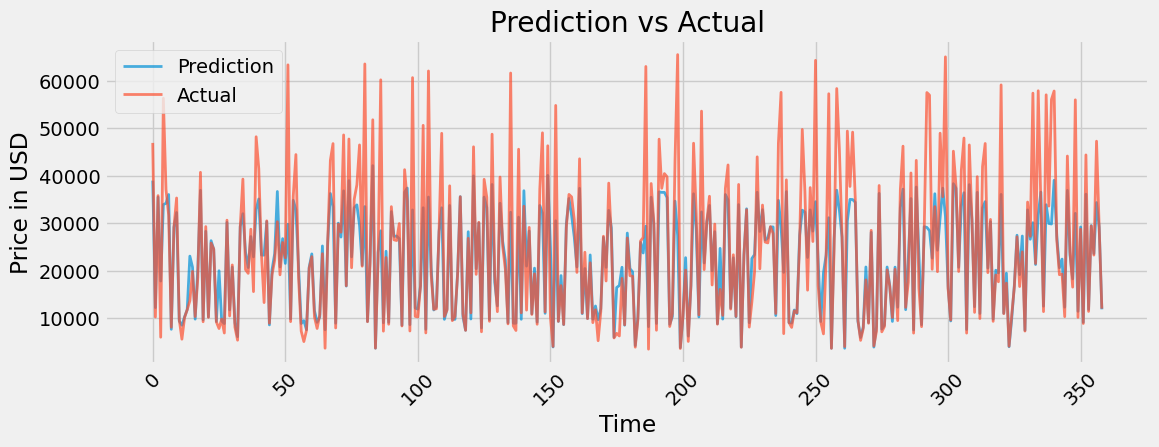

In [12]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

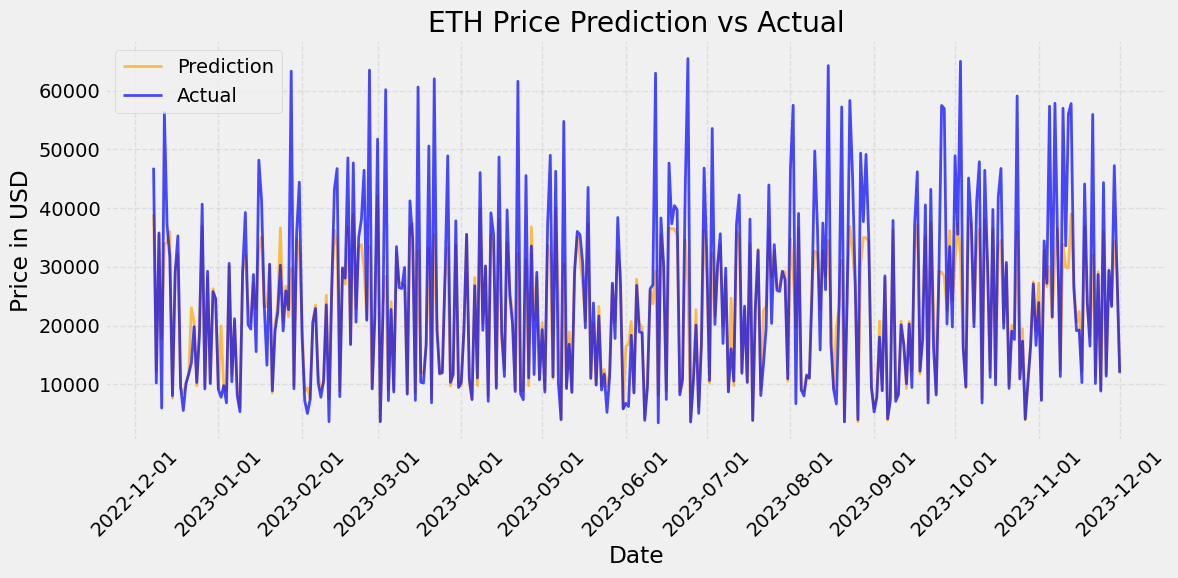

In [13]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], svm_prediction, label='Prediction', color='orange', lw=2, alpha=0.7)
plt.plot(df.index[-len(y_test):], y_test, label='Actual', color='blue', lw=2, alpha=0.7)
plt.title('ETH Price Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Add monthly ticks for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
